In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("C:/Users/HARSHA/Downloads/Fraud_check (1).csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df[df.duplicated()].shape

(0, 6)

In [7]:
df = df.rename({'Taxable.Income': 'TaxableIncome'}, axis=1)

In [8]:
df['TaxableIncome'] = pd.cut(df.TaxableIncome,bins=(0,30000,199778),labels=['Risky','Good'])
df

,Undergrad,Marital.Status,TaxableIncome,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


<Figure size 1440x1440 with 0 Axes>

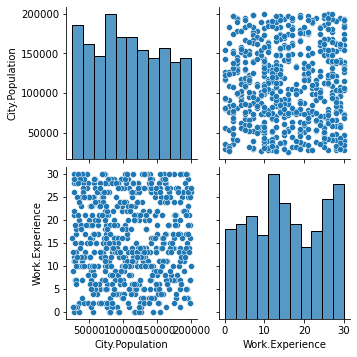

In [9]:
plt.figure(figsize=(20 , 20 ))
sns.pairplot(df)

In [10]:
x = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
label_encoder_x=LabelEncoder()

In [12]:
x=x.apply(LabelEncoder().fit_transform)

In [13]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
rf

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [14]:
rf.fit(x,y)

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [15]:
rf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=819978295),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=761670219),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1854270241),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1821229902),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=980076297),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1319045050),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1932216631),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1391480888),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
         

In [16]:
rf.classes_

array(['NO', 'YES'], dtype=object)

In [17]:
rf.n_classes_

2

In [18]:
rf.n_features_

5

In [19]:
rf.n_outputs_

1

In [20]:
rf.oob_score_

0.5116666666666667

In [21]:
rf.predict(x)

array(['YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',

In [22]:
df['rf_pred'] = rf.predict(x)

In [23]:
cols = ['rf_pred','TaxableIncome']
cols

['rf_pred', 'TaxableIncome']

In [24]:
df[cols].head()

,rf_pred,TaxableIncome
0,YES,Good
1,YES,Good
2,YES,Good
3,YES,Good
4,NO,Good


In [25]:
df['TaxableIncome']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxableIncome, Length: 600, dtype: category
Categories (2, object): [Risky < Good]

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['TaxableIncome'],df['rf_pred'])

array([[  0, 237,   0, 239],
       [  0,   0,   0,   0],
       [  0,  61,   0,  63],
       [  0,   0,   0,   0]], dtype=int64)

In [27]:
pd.crosstab(df['TaxableIncome'],df['rf_pred'])

rf_pred,NO,YES
TaxableIncome,,
Risky,61,63
Good,237,239
